# HW4- Opal Issan

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
words= np.loadtxt('hw4_vocab.txt', str)
unigram = np.loadtxt('hw4_unigram.txt', int)
bigram = np.loadtxt('hw4_bigram.txt', int)

In [3]:
#print(words)
print(np.shape(bigram))

(144981, 3)


# (a) 

In [4]:
kk= 0 
Total = np.sum(unigram)
for word in words:
    if word[0] == "M":
        print(str(word) +"  --> "+ str(unigram[kk]/Total))
    kk+=1

MILLION  --> 0.002072759168154815
MORE  --> 0.0017088989966186725
MR.  --> 0.0014416083492816956
MOST  --> 0.0007879173033190295
MARKET  --> 0.0007803712804681068
MAY  --> 0.0007298973156289532
M.  --> 0.0007034067394618568
MANY  --> 0.0006967290595970209
MADE  --> 0.0005598610827336895
MUCH  --> 0.0005145971758110562
MAKE  --> 0.0005144626437991272
MONTH  --> 0.00044490959363187093
MONEY  --> 0.00043710673693999306
MONTHS  --> 0.0004057607781605526
MY  --> 0.0004003183467688823
MONDAY  --> 0.00038198530259784006
MAJOR  --> 0.00037089252670515475
MILITARY  --> 0.00035204581485220204
MEMBERS  --> 0.00033606096579846475
MIGHT  --> 0.00027358919153183117
MEETING  --> 0.0002657374141083427
MUST  --> 0.0002665079156312084
ME  --> 0.00026357267173457725
MARCH  --> 0.0002597935452176646
MAN  --> 0.0002528834918776787
MS.  --> 0.0002389900041002911
MINISTER  --> 0.00023977273580605944
MAKING  --> 0.00021170446604452378
MOVE  --> 0.0002099555498894477
MILES  --> 0.00020596851026319035


# (b)

In [5]:
# search for the index of word "THE" in words
kk=1
for word in words:
    if word=="THE":
        print(kk)
        break
    kk+=1
words[3]

4


'THE'

In [6]:
# now find the probabilities of P(THE|SOMETHING) most probabable
top_ten_word = np.zeros(10, dtype=int)
top_ten_count = np.zeros(10, dtype=int) 

total_count = 0

for word1, word2, count in bigram:
    if word1==4:
        total_count += count
        #print(words[word2-1], count)
        if count >= np.min(top_ten_count):
            index = np.argmin(top_ten_count)
            top_ten_count[index] =  count
            top_ten_word[index] = word2-1

In [7]:
def conditional_prob(w1, w2):
    holder = 0 
    total_count = 0
    for word1, word2, count in bigram:
        if word1==w1:
            total_count += count
            if word2 ==w2:
                holder =  count
    return holder/total_count

In [8]:
def find_index(word):
    kk=1
    for w in words:
        if w == word:
            return kk
        else:
            kk+=1
    return 1

In [9]:
np.argsort(top_ten_count)

sorted_words = words[top_ten_word[np.flip(np.argsort(top_ten_count))]]
sorted_count = top_ten_count[np.flip(np.argsort(top_ten_count))]/total_count


In [10]:
for ii in range(len(top_ten_word)):
    print(str(sorted_words[ii]) + "---" + str(sorted_count[ii]))

<UNK>---0.6150198100055118
U.---0.013372499432610317
FIRST---0.011720260675031612
COMPANY---0.011658788055636611
NEW---0.009451480076516552
UNITED---0.008672308141231398
GOVERNMENT---0.006803488635995202
NINETEEN---0.006650714911000876
SAME---0.006287066757449016
TWO---0.006160749602827221


# (c)

first lets compute the probability of the sentence in a unigram. 

In [11]:
# THE, STOCK, MARKET, FELL, BY, ONE, HUNDRED, POINTS, LAST, WEEK 
prob_array = np.zeros(10)

kk=0
for word in words:
    if word=="THE":
        prob_array[0] = unigram[kk]/Total
    elif word=="STOCK":
        prob_array[1] = unigram[kk]/Total
    elif word=="MARKET":
        prob_array[2] = unigram[kk]/Total
    elif word=="FELL":
        prob_array[3] = unigram[kk]/Total
    elif word=="BY":
        prob_array[4] = unigram[kk]/Total
    elif word=="ONE":
        prob_array[5] = unigram[kk]/Total
    elif word=="HUNDRED":
        prob_array[6] = unigram[kk]/Total
    elif word=="POINTS":
        prob_array[7] = unigram[kk]/Total
    elif word=="LAST":
        prob_array[8] = unigram[kk]/Total
    elif word=="WEEK":
        prob_array[9] = unigram[kk]/Total
    kk+=1

In [12]:
uni_prob = 1
for prob in prob_array:
    uni_prob *= prob

In [13]:
np.log(uni_prob)

-64.50944034364878

In [14]:
np.log(conditional_prob(w1=find_index("<s>"), w2=find_index("THE"))
      * conditional_prob(w1=find_index("THE"), w2=find_index("STOCK"))
      * conditional_prob(w1=find_index("STOCK"), w2=find_index("MARKET"))
      * conditional_prob(w1=find_index("MARKET"), w2=find_index("FELL"))
      * conditional_prob(w1=find_index("FELL"), w2=find_index("BY"))
      * conditional_prob(w1=find_index("BY"), w2=find_index("ONE"))
      * conditional_prob(w1=find_index("ONE"), w2=find_index("HUNDRED"))
      * conditional_prob(w1=find_index("HUNDRED"), w2=find_index("POINTS"))
      * conditional_prob(w1=find_index("POINTS"), w2=find_index("LAST"))
      * conditional_prob(w1=find_index("LAST"), w2=find_index("WEEK")))

-40.91813213378977

# (d) 

In [15]:
# THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE
# unigram
prob_array = np.zeros(10)
Total= np.sum(unigram)
prod = (unigram[find_index("THE")-1]/Total) * unigram[find_index("SIXTEEN")-1]/Total* unigram[find_index("OFFICIALS")-1]/Total * unigram[find_index("SOLD")-1]/Total * unigram[find_index("FIRE")-1]/Total * unigram[find_index("INSURANCE")-1]/Total
np.log(prod)

-44.291934473132606

In [16]:
# bigram 
bi_d = conditional_prob(w1=find_index("<s>"), w2=find_index("THE")) * conditional_prob(w1=find_index("THE"), w2=find_index("SIXTEEN")) * conditional_prob(w1=find_index("SIXTEEN"), w2=find_index("OFFICIALS")) * conditional_prob(w1=find_index("OFFICIALS"), w2=find_index("SOLD")) * conditional_prob(w1=find_index("SOLD"), w2=find_index("FIRE")) * conditional_prob(w1=find_index("FIRE"), w2=find_index("INSURANCE"))
print(bi_d)

0.0


# (e)

In [17]:
lam = np.linspace(0.01, 1, 100)

def new_prob(w1, w2, lam):
    Total = np.sum(unigram)
    return lam * (unigram[find_index(w2)-1]/Total) + (1-lam) * conditional_prob(w1=find_index(w1), w2=find_index(w2))

In [18]:
res = np.zeros(len(lam))

In [19]:
# THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE
ii=0
for l in lam:
    res[ii] = np.log(new_prob(w1="<s>", w2="THE", lam=l) *
                     new_prob(w1="THE", w2="SIXTEEN", lam=l) *
                     new_prob(w1="SIXTEEN", w2="OFFICIALS", lam=l) *
                     new_prob(w1="OFFICIALS", w2="SOLD", lam=l) *
                     new_prob(w1="SOLD", w2="FIRE", lam=l) *
                     new_prob(w1="FIRE", w2="INSURANCE", lam=l))
    ii+=1

Text(0, 0.5, 'Log-likelihood')

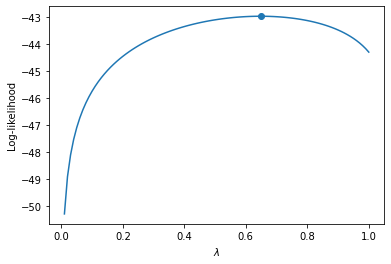

In [20]:
plt.plot(lam, res)
plt.scatter(lam[np.argmax(res)], np.max(res))
plt.xlabel("$\lambda$")
plt.ylabel("Log-likelihood")

In [21]:
lam[np.argmax(res)]

0.65